<a href="https://colab.research.google.com/github/pazz09/ADA-Informes/blob/main/KRUSKAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- **DESCRIPCIÓN DEL PROBLEMA**  :

El problema consiste en minimizar el costo al conectar objetos, para ello se utilizarán nodos(objetos) y conexiones (peso = valor).

**Entrada**: Grafo no dirigido G = [V, E], que contiene el costo de cada arco (E) y los nodos (V).

**Salida**: Un arbol de expansión minimo. Que indica las conexiones entre los nodos y el peso correspondiente.










----------------------------------------------------------


2- **ALGORITMO A UTILIZAR**:

**KRUSKAL**

Para resolver el problema, existen varios algortimos. En este caso utilizaremos el Kruskal.

El algortimo Kruskal es de tipo Greedy, es decir, conecta los nodos desde el que tiene el menor costo hasta el que tiene el costo mayor.

El objetivo es hallar el árbol con el mínimo costo, que conecte todos los nodos sin ciclos.

*Funcionamiento:*

Entrada: **G = [V, E]**

1. Se crea **G**, conjunto vacio.

2. Se ordena de forma ascendente los arcos del grafo, según los costos.

3. Se busca el arco de menor costo, como el arco inicial.

4. Si el arco seleccionado conecta dos vertices distintos, entonces agregamos la arista verificando que no se formen ciclos. Si forma un ciclo no se agrega al arbol.

5. Continuamos el proceso hasta marcar todos los arcos. 

Salida: **Árbol que indica el costo mínimo.**

 

---------------------------
**EJEMPLO**

Utilizaremos el siguiente grafo.

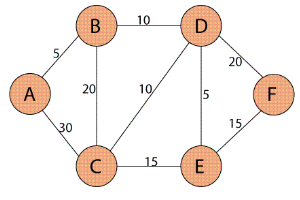

Primero vamos a ordenar las aristas del grafo por su peso de menor a mayor.

D - 5 - E

A - 5 - B

B - 10 - D

D - 10 - C

C - 15 - E

F - 15 - E

D - 20 - F

B - 20 - C

A - 30 - C

Luego unimos cada arista, teniendo cuidado de no formar ciclos. Esto mediante el **método greddy**.

Comenzamos con las arista de menor peso.

**D - 5 - E**

**A - 5 - B**


Luego la unimos a otra arista que le sigue con menor peso, siempre y cuando no formen ciclos. Para unir cada arista se utiliza la función **Union-Find**.

(**A - 5 - B**) --> (**B - 10 - D**) --> (**D - 10 - C**)

Como (**D - 10 - C**) forma ciclo si la unimos con (**C - 20 - B**) o con (**C - 15 - E**), elegimos la 2a arista con menor peso.

(**D - 5 - E**)

El proceso continua.

(**D - 5 - E**) --> (**E - 15 - F**)

Obtenemos como salida:

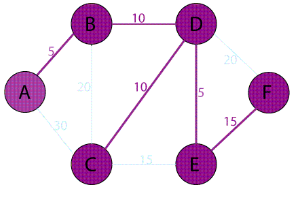

D - 5 - E

A - 5 - B

B - 10 - D

D - 10 - C

F - 15 - E

--------------------------------------
3- **IMPLEMENTACIÓN DEL ALGORITMO**

In [78]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Graph:

    #Transformador
    def graph_to_nxgraph(self,G):
      X = []
      arbol = nx.Graph()
      for u, v, w in G:
          if(u not in X):
              X.append(u)
              arbol.add_node(u)
          if(v not in X):
              X.append(v)
              arbol.add_node(v)
          arbol.add_edge(u,v, weight = w)
      return arbol

    def __init__(self, vertices):
        self.V = vertices 
        self.graph = [] 

    #Función que agrega un arco al grafo
    def agregar(self, u, v, w):
      self.graph.append([u, v, w])

    #Función Union
    def union(self, padre, rango, x, y):
      if rango[x] < rango[y]:
          padre[x] = y
      elif rango[x] > rango[y]:
          padre[y] = x
      else:
          padre[y] = x
          rango[x] += 1

    #Función Find
    def find(self, padre, i):
      if padre[i] != i:
          padre[i] = self.find(padre, padre[i])
      return padre[i]

    #Función para mostrar grafo
    def mostrarGrafo(self, r):
      T = self.graph_to_nxgraph(r)
      pos=nx.spring_layout(T)
      labels = nx.get_edge_attributes(T,'weight')
      nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
      nx.draw(T,pos, node_color="pink", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")

    #Función KRUSKAL
    def kruskal(self, verbose = False, visualize = False):
      G = [] 
      i = 0
      e = 0

      padre = []
      rango = []
  
      if verbose:
          print("")
          print(f"Se ordenan los arcos: {self.graph}")
      self.graph = sorted(self.graph, key=lambda item:item[2])

      if verbose:
          print(f"Arcos ordenados de menor a mayor: {self.graph}")
 
      for node in range(self.V):
          padre.append(node)
          rango.append(0)
        
      while e < self.V - 1:
          u, v, w = self.graph[i]
          i = i + 1
          x = self.find(padre, u)
          y = self.find(padre, v)

          if verbose: 
              print("")
              print(f"Nuevo arbol: {G}")
              print(f"Se verifica si no forman ciclos: {u} - {v}")
          if x != y:
              e = e + 1
              G.append([u, v, w])
              self.union(padre, rango, x, y)

              if verbose:
                  print("")
                  print(f"Se agrega al árbol, {u} - {v} no generaran ciclos")
                  print("Nuevo arbol: ",G)
                  if e >= self.V - 1: 
                      print("El arbol esta completo")
          elif verbose:
              print("")
              print(f"No se agrega al árbol, {u} - {v} generaran ciclos")
        
      if visualize:
          self.mostrarGrafo(G)
        
      return G


In [79]:
import random

#Generador de instancias
def graph_instance_creator(V):
  grafo = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      grafo.graph.append([i, j, random.randint(1, 100)])
  
  return grafo

------------------------------

Grafo aleatorio: 


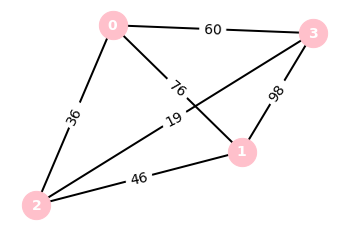

In [116]:
grafo = graph_instance_creator(4)
print("Grafo aleatorio: ")
grafo.mostrarGrafo(grafo.graph)

El costo minimo es: 101


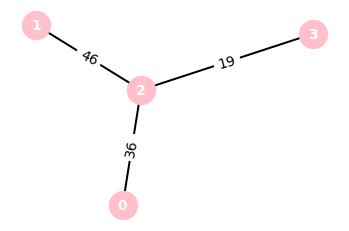

In [117]:
arbol = grafo.kruskal(False,True)
costo_minimo = 0
for u, v, peso in arbol:
  costo_minimo += peso
print(f"El costo minimo es: {costo_minimo}")

**PASO A PASO**



In [118]:
arbol = grafo.kruskal(True,False)
costo_minimo = 0
for u, v, peso in arbol:
  costo_minimo += peso
print("")
print(f"El costo minimo es: {costo_minimo}")


Se ordenan los arcos: [[2, 3, 19], [0, 2, 36], [1, 2, 46], [0, 3, 60], [0, 1, 76], [1, 3, 98]]
Arcos ordenados de menor a mayor: [[2, 3, 19], [0, 2, 36], [1, 2, 46], [0, 3, 60], [0, 1, 76], [1, 3, 98]]

Nuevo arbol: []
Se verifica si no forman ciclos: 2 - 3

Se agrega al árbol, 2 - 3 no generaran ciclos
Nuevo arbol:  [[2, 3, 19]]

Nuevo arbol: [[2, 3, 19]]
Se verifica si no forman ciclos: 0 - 2

Se agrega al árbol, 0 - 2 no generaran ciclos
Nuevo arbol:  [[2, 3, 19], [0, 2, 36]]

Nuevo arbol: [[2, 3, 19], [0, 2, 36]]
Se verifica si no forman ciclos: 1 - 2

Se agrega al árbol, 1 - 2 no generaran ciclos
Nuevo arbol:  [[2, 3, 19], [0, 2, 36], [1, 2, 46]]
El arbol esta completo

El costo minimo es: 101


--------------------------------------------


**4- PROPIEDADES DEL ALGORITMO**

CORRECTITUD **KRUSKAL**

**Teorema:** 

El algortimo como entrada recibe G = (V,E), donde V = nodos y E = arcos. Con estos datos retorna un árbol de costo minimo.

**Prueba del teorema:**

*Caso base:*

Cuando n = 0, entonces V = 0. Como V = 0, el grafo ya nos retorna el árbol de costo mínimo.

*Inducción:*

Un grafo **A** con **n** arcos y un  árbol de costo mínimo **B** que abarca **A**.

1. Al escoger un arco de **A**, esté está en el árbol **B**. Cumple que el algoritmo kruskal retorna el arbol de costo mínimo.
2. Si no, **B** contiene arcos que no tiene **A**, y **b** contiene ciclos.

Solo se cumple cuando **A** es un árbol de mínimo costo.


----------------------

TIEMPO DE EJECUCIÓN **KRUSKAL**

***Teorema:*** 

Tiempo de ejecución: **O(E log V)** 

***Prueba del teorema:***

Como sabemos, E = arcos. Para ordenar estos **E** arcos tenemos una complejidad temporal de O(E * log E).

Para agregar arcos al árbol se utiliza la función Union-Find, este tiene como complejidad O(E * log V).

Si sumamos estas dos complejidades nos da como total:

O(E * log E) + O(E * log V) = **O(E * log E + E * log V)**

La complejidad de kruskal puede ser cualquiera de las dos:

O(E * log V) = O(E * log E)

Sin embargo es mejor utilizar O(E * log V) para mayor exactitud.



----------------
5- EXPERIMENTOS Y ANÁLISIS



**Tiempo de ejecución a medida que aumenta la cantidad de nodos**

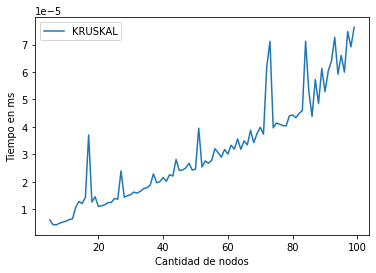

In [103]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for i in range(5,100):
    grafo = graph_instance_creator(i)
    a = repeat(setup="from __main__ import Graph", stmt=f"{grafo.kruskal()}", repeat=1, number=10)
    x.append(i)
    y.append(a)

plt.plot(x,y)
plt.legend(["KRUSKAL"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

**ANÁLISIS DEL GRÁFICO**

Como se puede observar, a medida que aumenta la cantidad de nodos, el tiempo de ejecución aumenta. Esto ocurre ya que el algortimo utilíza el método Greedy, es decir, busca la forma más facil y rápida para resolver el problema.

**Tiempo de ejecución de los algoritmos Kruskal y Prim**

prim

In [99]:
import sys

class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]for row in range(vertices)]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])
    def MST(self, parent):
        r = []
        for i in range(1, self.V):
            r.append([parent[i], i, self.graph[i][parent[i]]])
        return r
    def minKey(self, key, mstSet):
        min = sys.maxsize
        min_index = -1
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index
    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V 
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1  
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        return self.MST(parent)
def graphToGraph2(G, n):
    g = Graph2(n)

    for u,v,w in G.graph:
        g.graph[u-1][v-1] = w
        g.graph[v-1][u-1] = w
    return g


Gráfico

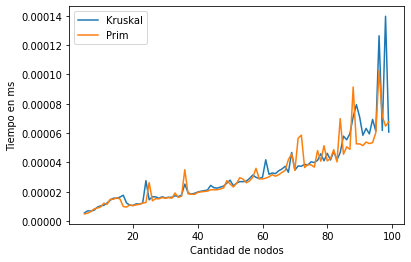

In [112]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for i in range(5,100):

    grafo = graph_instance_creator(i)
    grafo2 = graphToGraph2(grafo,i)
    a = repeat(setup="from __main__ import Graph", stmt=f"{grafo.kruskal()}", repeat=1, number=10)
    b = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(i)
    y.append(a)
    z.append(b)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

Como no se puede observar muy bien, reducire la cantidad de nodos.

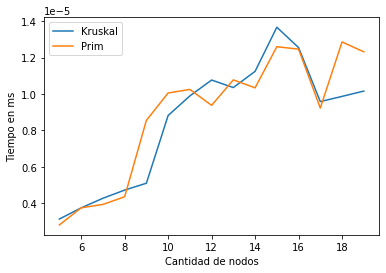

In [110]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for i in range(5,20):

    grafo = graph_instance_creator(i)
    grafo2 = graphToGraph2(grafo,i)
    a = repeat(setup="from __main__ import Graph", stmt=f"{grafo.kruskal()}", repeat=1, number=10)
    b = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(i)
    y.append(a)
    z.append(b)


plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

**ANÁLISIS DEL GRÁFICO**

Como se puede observar en los dos gráficos, uno con una cantidad elevada de nodos y otro con pocos nodos, no se ve una diferencia muy notoria, incluso se podria decir casi nula. Sin embargo se sabe que el algortimo **prim** tiene un mayor tiempo de ejecución que **kruskal**. Estos dos algortimos aunque tienen tiempos de ejecución diferentes, a medida que la cantidad de nodos aumentan, se igualan en tiempo de ejecución. 